# Implementing Ollivier-Ricci Curvature with Diffusion EMD

In [24]:
%load_ext autoreload
%autoreload 2
import numpy as np
from DiffusionEMD import DiffusionCheb
from pecan import data
import matplotlib.pyplot as plt
import graphtools
from DiffusionEMD.estimate_utils import l1_distance_matrix

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Build the torus and create a graph, along with the accompanying diffusion operator.

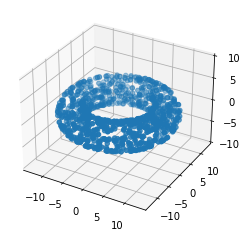

In [2]:
X = data.torus(1000,inner_radius=3,outer_radius=10) # make a 500 point torus
# visualize
fig = plt.figure()
ax = plt.subplot(projection='3d')
ax.set_zlim(-10,10)
ax.scatter(X[:,0],X[:,1],X[:,2])

In [5]:
G = graphtools.graphs.kNNGraph(X)

In [22]:
P = G.P.toarray()
P_symmetric = G.diff_aff.toarray()
A = G.K.toarray() - np.eye(len(P))

Create two distributions on the torus.

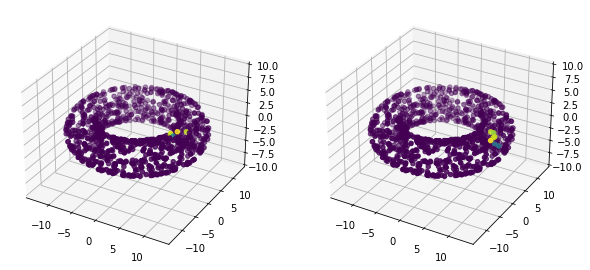

In [19]:
distributions = np.zeros((len(A),2))
distributions[:,0][40] = 1
distributions[:,1][55] = 1
# diffuse the distributions for one step
distributions = P @ distributions
# visualize the result
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1,projection='3d')
ax1.set_zlim(-10,10)
ax1.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,0])
ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_zlim(-10,10)
ax2.scatter(X[:,0],X[:,1],X[:,2],c=distributions[:,1])

Find DEMD between distributions

In [23]:
demd = DiffusionCheb() # a form of the DEMD that uses chebyshev polynomial approximations to eigendecompose P
embeddings = demd.fit_transform(A,distributions)

In [25]:
l1_distance_matrix(embeddings)

array([[0.        , 0.38395092],
       [0.38395092, 0.        ]])